## Decision Tree

In [5]:
# Importa as bibliotecas utilizadas no projeto
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.metrics import r2_score

#pip install pydotpus
#pip install graphviz

# Seta um valor para o random seed
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

Para a realização do projeto, foi necessário instalar bibliotecas como o pydotplus e o graphviz, com a função "pip install graphviz" no anaconda prompt, com o intuito de fazer o gráfico localizado no final deste documento. Além disso, bibliotecas como o skylearn foram utilizadas por possuirem funções relativas a Decision Tree.

In [47]:
# Seta as colunas da nossa tabela
colunas=["Country","Region","Hemisphere","HappinessScore","HDI","GPD_PerCapita","Beer_PerCapita","Spirit_PerCapita","Wine_PerCapita"]

# Importa a base de dados "HappinessAlcoholConsumprion.xls"
dados = pd.read_excel("HappinessAlcoholConsumption.xls", header=None, names=colunas)
dados = dados.iloc[1:,] #retira a primeira coluna
dados.head(3) #printa os dados
dados

,Country,Region,Hemisphere,HappinessScore,HDI,GPD_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
1,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
2,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
3,Iceland,Western Europe,north,7.501,933,60.53,233,61,78
4,Norway,Western Europe,north,7.498,951,70.89,169,71,129
5,Finland,Western Europe,north,7.413,918,43.433,263,133,97
6,Canada,North America,north,7.404,922,42.349,240,122,100
7,Netherlands,Western Europe,north,7.339,928,45.638,251,88,190
8,New Zealand,Australia and New Zealand,south,7.334,915,40.332,203,79,175
9,Australia,Australia and New Zealand,south,7.313,938,49.897,261,72,212
10,Sweden,Western Europe,north,7.291,932,51.845,152,60,186


In [7]:
# Seleciona quais serão as colunas de estudo
feature_cols = ["HDI","GPD_PerCapita","Beer_PerCapita","Spirit_PerCapita","Wine_PerCapita"]
X = dados[feature_cols]
y = dados.HappinessScore

In [8]:
# Separa os dados em 90% treino e 10% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=RANDOM_SEED) 

In [46]:
X_test

,HDI,GPD_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
19,904,100.739,236,133,271
46,709,4.96,263,114,8
48,797,7.715,124,246,12
90,413,481,25,3,2
5,918,43.433,263,133,97
41,679,3.769,52,69,2
63,807,9.532,297,122,167
108,496,735,1,326,1
32,748,5.979,99,258,1
56,894,21.65,270,51,276


In [9]:
# Faz a Decision Tree
dt = DecisionTreeRegressor(random_state = 42, max_depth=4) # Decision Tree com profundidade máxima de 4 níveis

dt = dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

In [10]:
r2_score(y_pred, y_test) #R ao quadrado

0.7437722852548738

In [12]:
# Calculando a diferença entre o valor do teste e do treinamento
erro=[]
for i,e in zip(y_pred,y_test):
    if i<e:
     diferenca= e-i
     erro.append(diferenca)
    else:
     diferenca= i-e
     erro.append(diferenca)

classificacao=[]
for erros in erro: 
    if erros< 0.5: 
        classfi= 'Certo'
        classificacao.append(classfi)
    else:
        classfi= 'Errado'
        classificacao.append(classfi)

In [13]:
data = {
'Y_pred': y_pred,
'Y_test': y_test,
'Erro': erro, 
'Classificação': classificacao,
}
tabela = pd.DataFrame(data, columns=['Y_pred', 'Y_test','Erro','Classificação' ]) # Cria uma tabela
tabela

,Y_pred,Y_test,Erro,Classificação
19,7.322182,6.871,0.451182,Certo
46,5.451800,5.956,0.504200,Errado
48,5.451800,5.919,0.467200,Certo
90,3.843222,4.635,0.791778,Errado
5,7.322182,7.413,0.090818,Certo
41,5.451800,6.068,0.616200,Errado
63,6.021607,5.528,0.493607,Certo
108,3.843222,4.028,0.184778,Certo
32,5.451800,6.474,1.022200,Errado
56,6.021607,5.768,0.253607,Certo


In [14]:
contador=0
for c in classificacao: 
    if c == "Certo": 
        contador+=1
acertou=(contador/len(classificacao))*100
print("A Decision Tree acertou {0}%".format(acertou))

A Decision Tree acertou 61.53846153846154%


In [15]:
# Código para plotar o Decision Tree
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

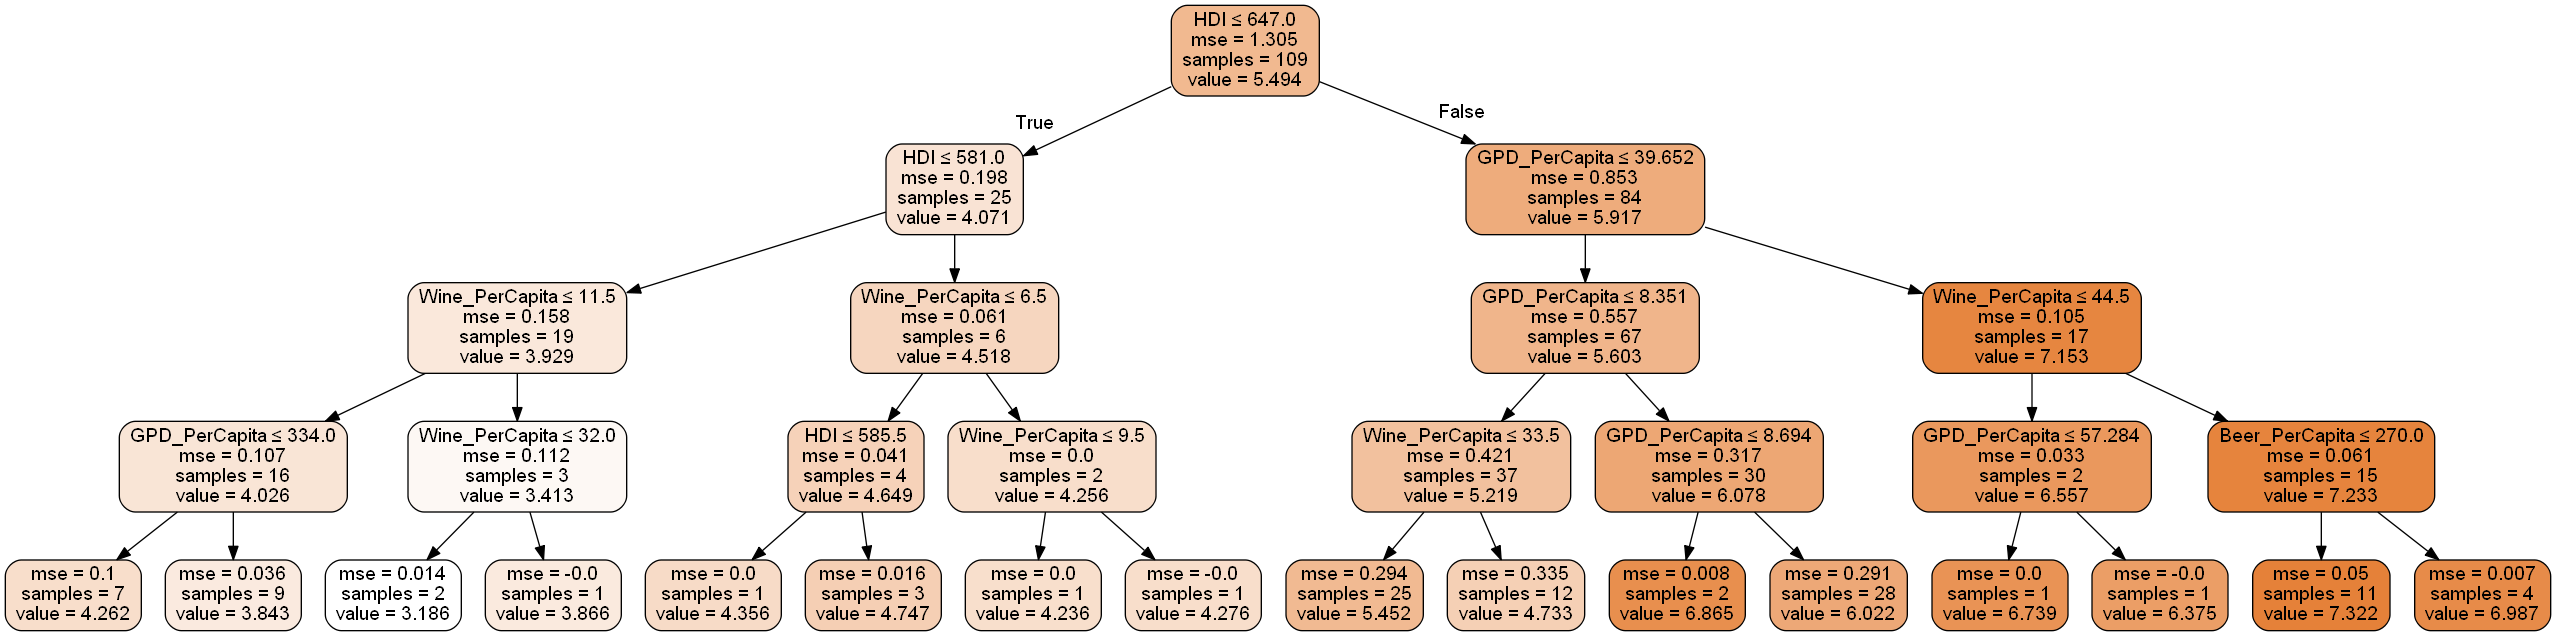

In [16]:
# Plota o Decision Tree
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('grafico.png')
Image(graph.create_png())

In [17]:
#! explorer .

## Tentativa de aumentar a acurácia (Optimizar a performance)

Com intuito de melhorar a acurácia (a porcentagem de acertos) da decision tree, foram setados os seguinter parâmetros no código responsável por calcular a decision tree: "criterion"='mse', splitter='random', max_depth=None, e o random state permaneceu igual com o valor de 42.

In [18]:
# Faz a Decision Tree
dt = DecisionTreeRegressor(criterion='mse',splitter='random', max_depth=None, random_state=RANDOM_SEED) 
    #Decision Tree sem limitação de profundidade máxima

dt = dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

In [19]:
r2_score(y_pred, y_test) #R ao quadrado

0.5537496185364053

In [20]:
# Calculando a diferença entre o valor do teste e do treinamento
erro=[]
for i,e in zip(y_pred,y_test):
    if i<e:
     diferenca= e-i
     erro.append(diferenca)
    else:
     diferenca= i-e
     erro.append(diferenca)

classificacao=[]
for erros in erro: 
    if erros< 0.5: 
        classfi= 'Certo'
        classificacao.append(classfi)
    else:
        classfi= 'Errado'
        classificacao.append(classfi)
    
data = {
'Y_pred': y_pred,
'Y_test': y_test,
'Erro': erro, 
'Classificação': classificacao,
}
tabela = pd.DataFrame(data, columns=['Y_pred', 'Y_test','Erro','Classificação' ]) #Cria uma tabela

contador=0
for c in classificacao: 
    if c == "Certo": 
        contador+=1
acertou=(contador/len(classificacao))*100
print("A Decision Tree acertou {0}%".format(acertou))

A Decision Tree acertou 53.84615384615385%


In [21]:
# Código para plotar o Decision Tree
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

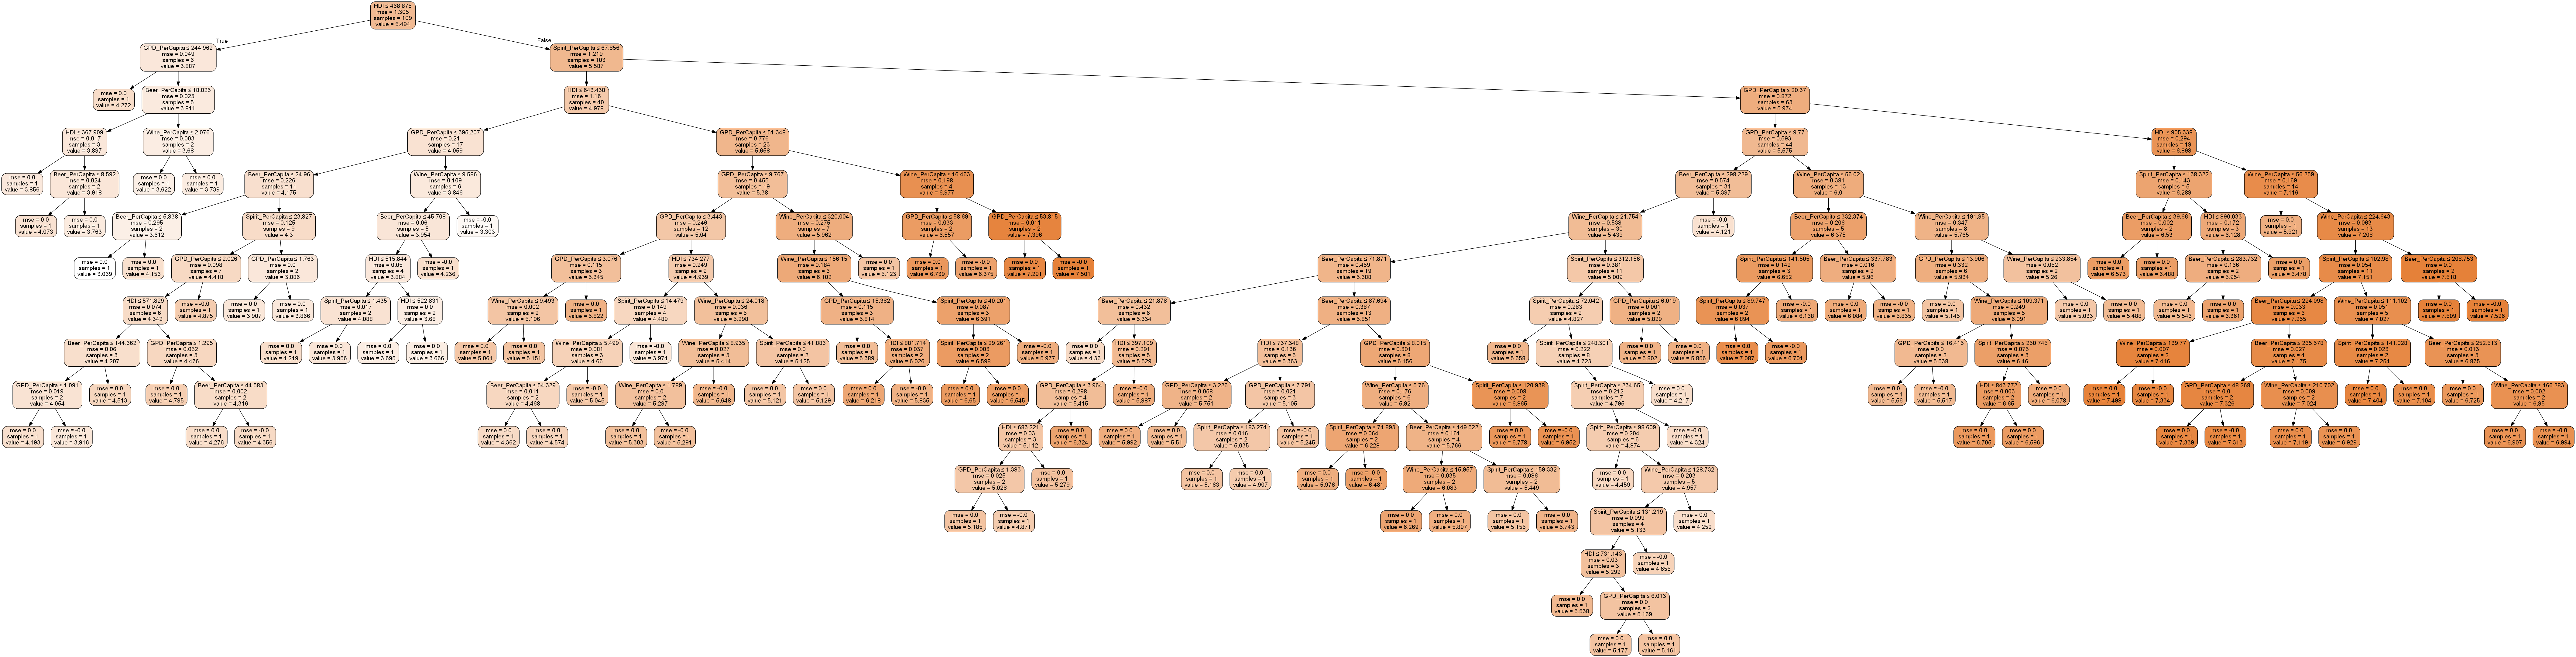

In [22]:
# Plota o Decision Tree
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('grafico2.png')
Image(graph.create_png())

É possível analizar que, quando a decision tree não tem limitação de profundidade, e o splitter é o random, a acurácia ao invés de aumentar, na realidade diminuiu.

In [23]:
# ! explorer .